# Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Data Cleaning

In [2]:
file_path = '/mnt/data/Sample - Superstore.csv'
superstore_data = pd.read_csv("/kaggle/input/store-sales-analysis/Sample - Superstore.csv", encoding='latin1')

superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])
superstore_data['Ship Date'] = pd.to_datetime(superstore_data['Ship Date'])

missing_values = superstore_data.isnull().sum()

superstore_data = superstore_data.drop_duplicates()

superstore_data['Sales'].fillna(superstore_data['Sales'].median(), inplace=True)
superstore_data['Profit'].fillna(superstore_data['Profit'].median(), inplace=True)

print(superstore_data.head())


   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category Sub-Ca

/tmp/ipykernel_35/1739533961.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  superstore_data['Sales'].fillna(superstore_data['Sales'].median(), inplace=True)
/tmp/ipykernel_35/1739533961.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

# Exploratory Data Analysis

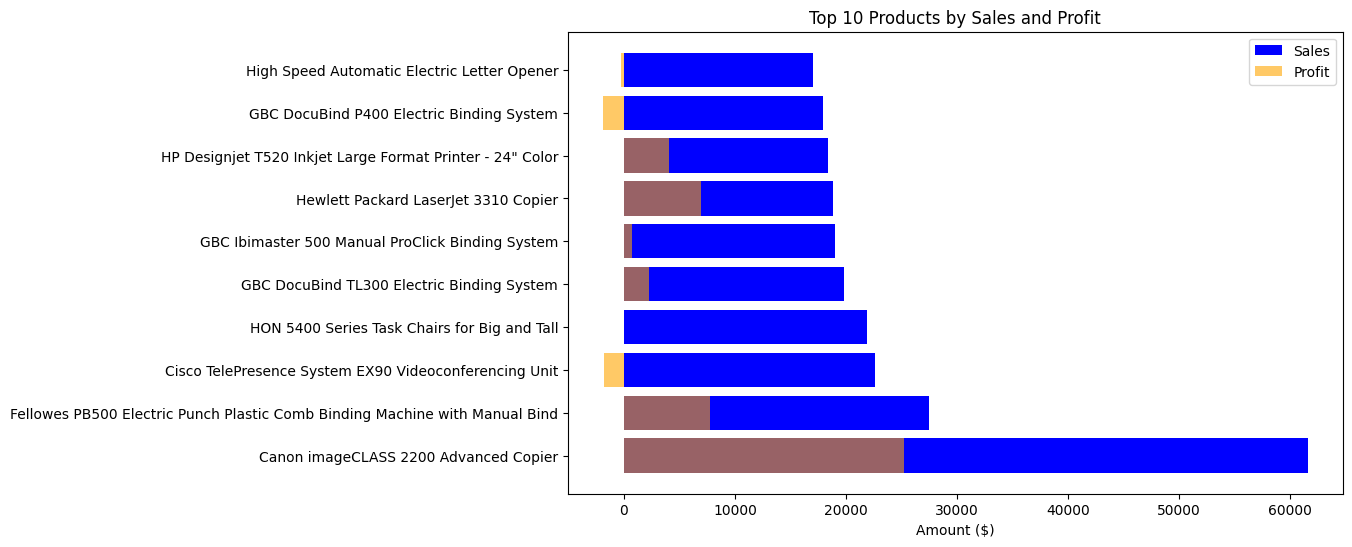

In [3]:
product_summary = superstore_data.groupby('Product Name').agg({'Sales': 'sum', 'Profit': 'sum', 'Quantity': 'sum'}).reset_index()


top_products_sales = product_summary.sort_values('Sales', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_products_sales['Product Name'], top_products_sales['Sales'], color='blue', label='Sales')
plt.barh(top_products_sales['Product Name'], top_products_sales['Profit'], color='orange', alpha=0.6, label='Profit')
plt.xlabel('Amount ($)')
plt.title('Top 10 Products by Sales and Profit')
plt.legend()
plt.show()


# Identify Key Performance Indicators (KPIs)

In [4]:
total_sales = superstore_data['Sales'].sum()
total_profit = superstore_data['Profit'].sum()
avg_profit_margin = (total_profit / total_sales) * 100

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Average Profit Margin: {avg_profit_margin:.2f}%")


Total Sales: $2,297,200.86
Total Profit: $286,397.02
Average Profit Margin: 12.47%


# Advanced Analysis

**Impact of Discounts on Product Performance**

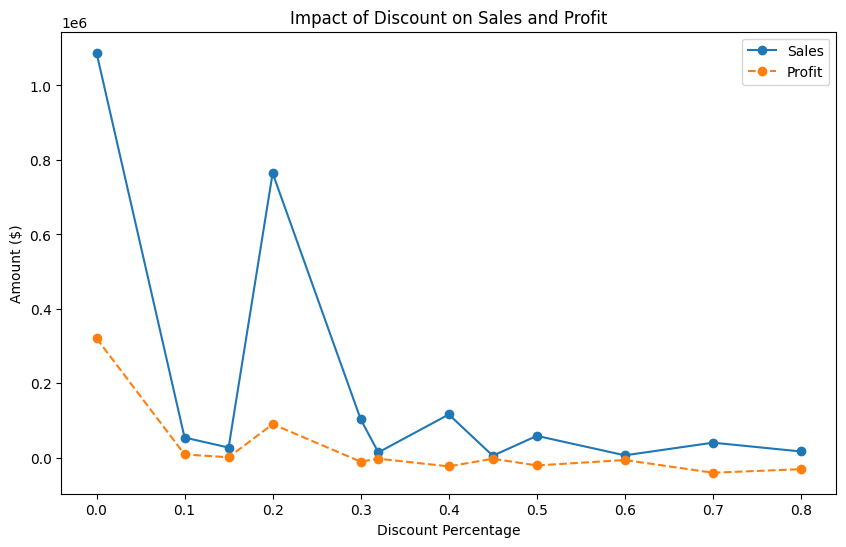

In [5]:
discount_analysis = superstore_data.groupby('Discount').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))
plt.plot(discount_analysis['Discount'], discount_analysis['Sales'], label='Sales', marker='o')
plt.plot(discount_analysis['Discount'], discount_analysis['Profit'], label='Profit', marker='o', linestyle='--')
plt.xlabel('Discount Percentage')
plt.ylabel('Amount ($)')
plt.title('Impact of Discount on Sales and Profit')
plt.legend()
plt.show()


**Compare Product Performance Across Regions and Segments**

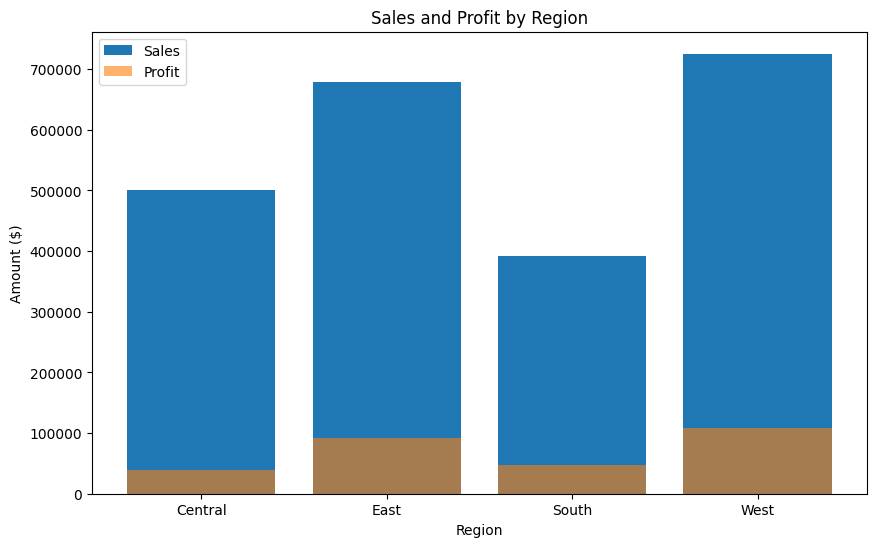

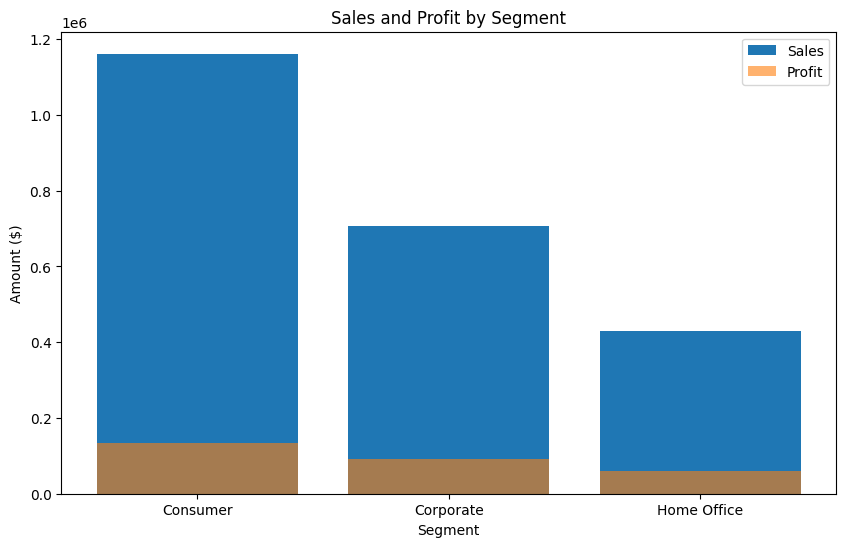

In [6]:
region_performance = superstore_data.groupby('Region').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))
plt.bar(region_performance['Region'], region_performance['Sales'], label='Sales')
plt.bar(region_performance['Region'], region_performance['Profit'], label='Profit', alpha=0.6)
plt.xlabel('Region')
plt.ylabel('Amount ($)')
plt.title('Sales and Profit by Region')
plt.legend()
plt.show()

segment_performance = superstore_data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))
plt.bar(segment_performance['Segment'], segment_performance['Sales'], label='Sales')
plt.bar(segment_performance['Segment'], segment_performance['Profit'], label='Profit', alpha=0.6)
plt.xlabel('Segment')
plt.ylabel('Amount ($)')
plt.title('Sales and Profit by Segment')
plt.legend()
plt.show()


# Prepare Insights and Report

This step involves generating insights and visualizations, which could be combined into a report. For this, you can create a simple summary dataframe or use any reporting tool (e.g., Jupyter Notebook or PowerPoint) to present the findings.

In [7]:
category_performance = superstore_data.groupby('Category').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

print(category_performance.sort_values('Sales', ascending=False))

category_performance.to_excel("product_performance_report.xlsx", index=False)


          Category        Sales       Profit
2       Technology  836154.0330  145454.9481
0        Furniture  741999.7953   18451.2728
1  Office Supplies  719047.0320  122490.8008


# Gantt Chart

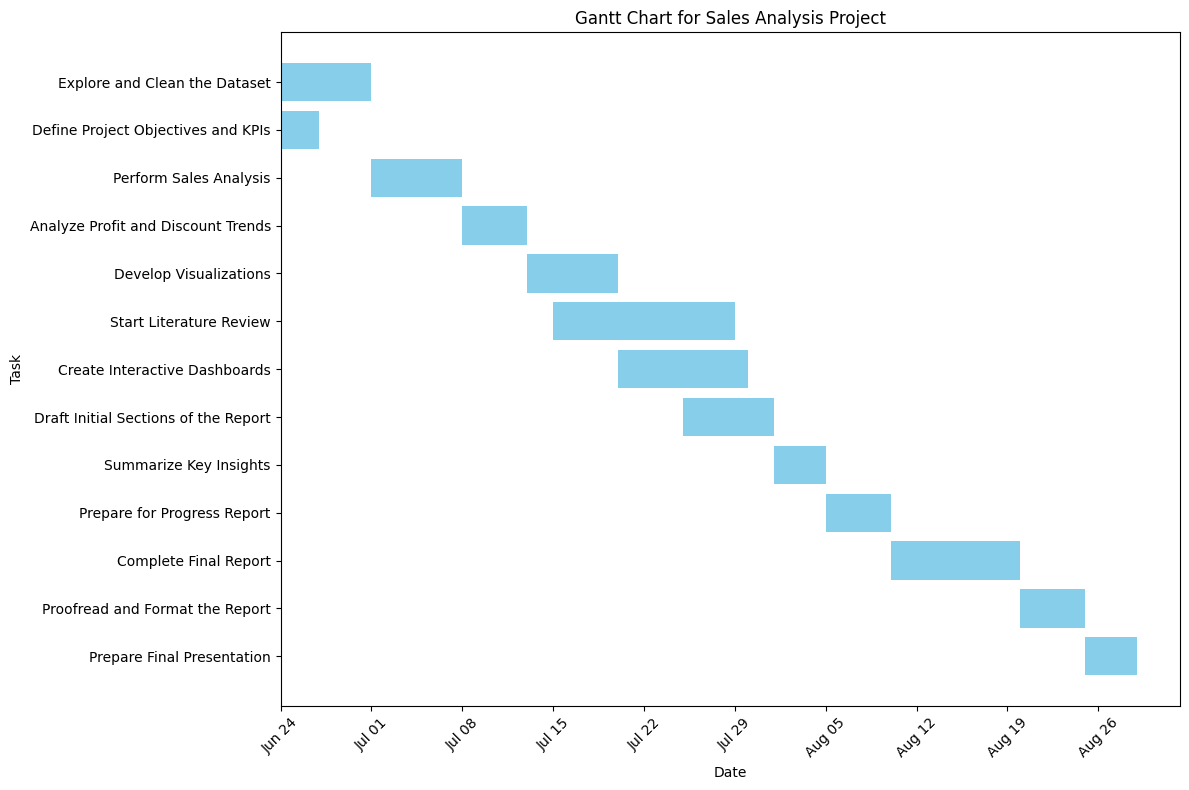

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Define the task list with start dates and durations (in days)
tasks = [
    {"Task": "Explore and Clean the Dataset", "Start": "2025-06-24", "Duration": 7},
    {"Task": "Define Project Objectives and KPIs", "Start": "2025-06-24", "Duration": 3},
    {"Task": "Perform Sales Analysis", "Start": "2025-07-01", "Duration": 7},
    {"Task": "Analyze Profit and Discount Trends", "Start": "2025-07-08", "Duration": 5},
    {"Task": "Develop Visualizations", "Start": "2025-07-13", "Duration": 7},
    {"Task": "Start Literature Review", "Start": "2025-07-15", "Duration": 14},
    {"Task": "Create Interactive Dashboards", "Start": "2025-07-20", "Duration": 10},
    {"Task": "Draft Initial Sections of the Report", "Start": "2025-07-25", "Duration": 7},
    {"Task": "Summarize Key Insights", "Start": "2025-08-01", "Duration": 4},
    {"Task": "Prepare for Progress Report", "Start": "2025-08-05", "Duration": 5},
    {"Task": "Complete Final Report", "Start": "2025-08-10", "Duration": 10},
    {"Task": "Proofread and Format the Report", "Start": "2025-08-20", "Duration": 5},
    {"Task": "Prepare Final Presentation", "Start": "2025-08-25", "Duration": 4},
]

# Convert to DataFrame
df = pd.DataFrame(tasks)
df["Start"] = pd.to_datetime(df["Start"])
df["End"] = df["Start"] + pd.to_timedelta(df["Duration"], unit='d')

# Plotting the Gantt chart
fig, ax = plt.subplots(figsize=(12, 8))
for i, task in df.iterrows():
    ax.barh(task["Task"], (task["End"] - task["Start"]).days, left=task["Start"], color="skyblue")

# Formatting the chart
ax.set_xlabel("Date")
ax.set_ylabel("Task")
ax.set_title("Gantt Chart for Sales Analysis Project")
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
plt.xticks(rotation=45)
plt.tight_layout()
plt.gca().invert_yaxis()

# Save the chart as an image file
plt.savefig("sales_analysis_gantt_chart.png")
plt.show()
